Code for finding damping of surface waves, experiments conducted 26.03.25. See: https://docs.google.com/document/d/1XbN39MnCO8LLxHQggMc_9GKM4Xrf986bgcMyIGY5DgE/edit?usp=share_link for report. 

Viscous boundary layer height for oscillatory flow:

$\delta = \sqrt{\frac{2 \nu}{2\pi f}}$

In [168]:
f = 1
mu = 10e-6
delta = np.sqrt((2*mu)/(2*np.pi*f))  # [m]
print(f'{delta*1000} mm')

1.7841241161527712 mm


In [169]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Only using 1 Hertz frequency data:

In [170]:
headers = ['time', 'p2', 'p1', 'p4', 'p3', 'speed_of_sound']

In [ ]:
 # Reading in the data
x9793_f1_r1 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x9793/f1/f1_A03_x9793_run1.csv', names=headers)
x9793_f1_r2 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x9793/f1/f1_A03_x9793_run2.csv', names=headers)
x9793_f1_r3 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x9793/f1/f1_A03_x9793_run3.csv', names=headers)

x1059_f1_r1 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x1059/f1/f1_A03_x1059_run1.csv', names=headers)
x1059_f1_r2 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x1059/f1/f1_A03_x1059_run2.csv', names=headers)
x1059_f1_r3 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x1059/f1/f1_A03_x1059_run3.csv', names=headers)

x1135_f1_r1 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x11350/f1/f1_A03_x11350_run1.csv', names=headers)
x1135_f1_r2 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x11350/f1/f1_A03_x11350_run2.csv', names=headers)
x1135_f1_r3 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x11350/f1/f1_A03_x11350_run3.csv', names=headers)

In [172]:
x9793_f1_r1

,time,p2,p1,p4,p3,speed_of_sound
0,01/01/2014 01:37:43.332,-0.00006,-0.00005,-0.00003,-0.00009,342.18
1,01/01/2014 01:37:43.336,-0.00006,-0.00005,-0.00003,-0.00009,342.18
2,01/01/2014 01:37:43.340,-0.00006,-0.00005,-0.00003,-0.00009,342.18
3,01/01/2014 01:37:43.344,-0.00006,0.00004,-0.00012,-0.00009,342.18
4,01/01/2014 01:37:43.348,-0.00006,-0.00005,-0.00003,0.00000,342.18
...,...,...,...,...,...,...
7491,01/01/2014 01:38:13.296,0.01380,0.00030,0.00450,0.01711,342.18
7492,01/01/2014 01:38:13.300,0.01354,-0.00005,0.00484,0.01711,342.18
7493,01/01/2014 01:38:13.304,0.01337,-0.00047,0.00536,0.01728,342.18
7494,01/01/2014 01:38:13.308,0.01303,-0.00090,0.00570,0.01753,342.18


In [183]:
# Converting the timestamps to datetime values
x9793_f1_r1['time'] = pd.to_datetime(x9793_f1_r1['time'])
x9793_f1_r2['time'] = pd.to_datetime(x9793_f1_r2['time'])
x9793_f1_r3['time'] = pd.to_datetime(x9793_f1_r3['time'])


x1059_f1_r1['time'] = pd.to_datetime(x1059_f1_r1['time'])
x1059_f1_r2['time'] = pd.to_datetime(x1059_f1_r2['time'])
x1059_f1_r3['time'] = pd.to_datetime(x1059_f1_r3['time'])

x1135_f1_r1['time'] = pd.to_datetime(x1135_f1_r1['time'])
x1135_f1_r2['time'] = pd.to_datetime(x1135_f1_r2['time'])
x1135_f1_r3['time'] = pd.to_datetime(x1135_f1_r3['time'])

In [184]:
# Positions of probes
x = np.array([9.793, 9.992, 10.192, 10.391, 10.590, 10.7885, 10.9855, 11.1835, 11.350, 11.549, 11.746, 11.944])

In [185]:
""" fig, ax = plt.subplots(1, 3, figsize=(30,10))

for i in range(1,5):
    ax[0].plot(x9793_f1_r1[f'p{i}'], lw=0.5)
    ax[0].plot(x9793_f1_r2[f'p{i}'], lw= 0.5)
    ax[0].plot(x9793_f1_r3[f'p{i}'], lw= 0.5)

ax[0].set_title('x = 9.9793 m, f = 1 Hz, A = 0.3 V')

for i in range(1,5):
    ax[1].plot(x1059_f1_r1[f'p{i}'], lw=0.5)
    ax[1].plot(x1059_f1_r2[f'p{i}'], lw=0.5)
    ax[1].plot(x1059_f1_r3[f'p{i}'], lw=0.5)

ax[1].set_title('x = 10.589 m, f = 1 Hz, A = 0.3 V')

for i in range(1,5):
    ax[2].plot(x1135_f1_r1[f'p{i}'], lw=0.5)
    ax[2].plot(x1135_f1_r2[f'p{i}'], lw=0.5)
    ax[2].plot(x1135_f1_r3[f'p{i}'], lw=0.5)

ax[2].set_title('x = 11.385 m, f = 1 Hz, A = 0.3 V')

fig.suptitle('Raw data') """

" fig, ax = plt.subplots(1, 3, figsize=(30,10))\n\nfor i in range(1,5):\n    ax[0].plot(x9793_f1_r1[f'p{i}'], lw=0.5)\n    ax[0].plot(x9793_f1_r2[f'p{i}'], lw= 0.5)\n    ax[0].plot(x9793_f1_r3[f'p{i}'], lw= 0.5)\n\nax[0].set_title('x = 9.9793 m, f = 1 Hz, A = 0.3 V')\n\nfor i in range(1,5):\n    ax[1].plot(x1059_f1_r1[f'p{i}'], lw=0.5)\n    ax[1].plot(x1059_f1_r2[f'p{i}'], lw=0.5)\n    ax[1].plot(x1059_f1_r3[f'p{i}'], lw=0.5)\n\nax[1].set_title('x = 10.589 m, f = 1 Hz, A = 0.3 V')\n\nfor i in range(1,5):\n    ax[2].plot(x1135_f1_r1[f'p{i}'], lw=0.5)\n    ax[2].plot(x1135_f1_r2[f'p{i}'], lw=0.5)\n    ax[2].plot(x1135_f1_r3[f'p{i}'], lw=0.5)\n\nax[2].set_title('x = 11.385 m, f = 1 Hz, A = 0.3 V')\n\nfig.suptitle('Raw data') "

In [176]:
# Constants
f = 1
beach_loc = 9.983  # location of beach after wave maker [m]
g = 9.81 # gravity 
rho = 1000  # water density
nu = 10e-6  # water viscosity
H0 = 0.4  # water depth before beach
H1 = 0.2  # water depth over beach

In [177]:
# Phase and group velocity, shallow water waves

c0 = np.sqrt(g*H0)  # wave velocity before beach
c1 = np.sqrt(g*H1)  # wave velocity over beach

In [ ]:
def time_of_arrival(df, position, wave_no):
    ''' 
    Find time of arrival of the wave number x for f = 1 Hz.
    Find index of where in df the wave arrives.
    The probes measure 124 times per second.
    '''

    if position > beach_loc:
        time_deep = beach_loc/c0
        time_shallow = (position - beach_loc)/c1

        arrival = time_deep + time_shallow + wave_no*f

    else:
        time_deep = position/c0
        arrival = time_deep + wave_no*f

    rows_per_second = df.groupby(pd.Grouper(key='time', freq='s')).size()

    index = int(rows_per_second.iloc[1]*arrival)

    return arrival, index

In [186]:
# Find the time in seconds for the 11th wave to reach the first probe
arrival_time_p1_x9, idx_time_p1_x9 = time_of_arrival(x9793_f1_r1, x[0], 11)
arrival_time_p2_x9, idx_time_p2_x9 = time_of_arrival(x9793_f1_r1, x[1], 11)
arrival_time_p3_x9, idx_time_p3_x9 = time_of_arrival(x9793_f1_r1, x[2], 11)
arrival_time_p4_x9, idx_time_p4_x9 = time_of_arrival(x9793_f1_r1, x[3], 11)

arrival_time_p1_x10, idx_time_p1_x10 = time_of_arrival(x1059_f1_r1, x[4], 11)
arrival_time_p2_x10, idx_time_p2_x10 = time_of_arrival(x1059_f1_r1, x[5], 11)
arrival_time_p3_x10, idx_time_p3_x10 = time_of_arrival(x1059_f1_r1, x[6], 11)
arrival_time_p4_x10, idx_time_p4_x10 = time_of_arrival(x1059_f1_r1, x[7], 11)

arrival_time_p1_x11, idx_time_p1_x11 = time_of_arrival(x1135_f1_r1, x[8], 11)
arrival_time_p2_x11, idx_time_p2_x11 = time_of_arrival(x1135_f1_r1, x[9], 11)
arrival_time_p3_x11, idx_time_p3_x11 = time_of_arrival(x1135_f1_r1, x[10], 11)
arrival_time_p4_x11, idx_time_p4_x11 = time_of_arrival(x1135_f1_r1, x[11], 11)

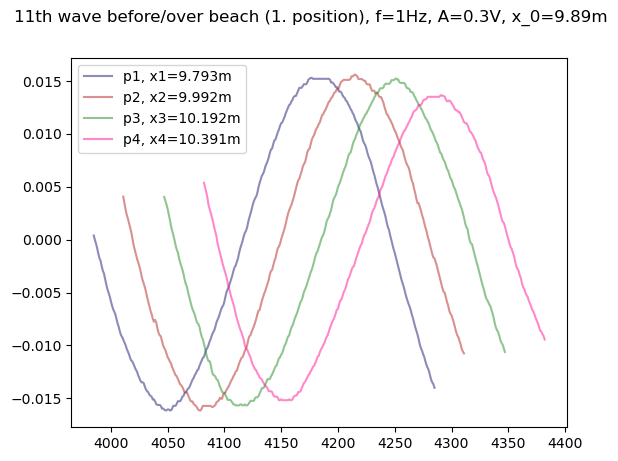

In [260]:
fig, ax = plt.subplots()

ax.plot(x9793_f1_r1.loc[idx_time_p1_x9:idx_time_p1_x9+300, 'p1'], label=f'p1, x1={x[0]}m', color='midnightblue', alpha=0.5)
#ax.plot(x9793_f1_r2.loc[idx_time_p1_x9:idx_time_p1_x9+300, 'p1'], label=f'p1, x1={x[0]}m', color='slateblue', alpha=0.5)
#ax.plot(x9793_f1_r3.loc[idx_time_p1_x9:idx_time_p1_x9+300, 'p1'], label=f'p1, x1={x[0]}m', color='cornflowerblue', alpha=0.5)

ax.plot(x9793_f1_r1.loc[idx_time_p2_x9:idx_time_p2_x9+300, 'p2'], label=f'p2, x2={x[1]}m', color='firebrick', alpha=0.5)
#ax.plot(x9793_f1_r2.loc[idx_time_p2_x9:idx_time_p2_x9+300, 'p2'], label=f'p2, x2={x[1]}m', color='indianred', alpha=0.5)
#ax.plot(x9793_f1_r3.loc[idx_time_p2_x9:idx_time_p2_x9+300, 'p2'], label=f'p2, x2={x[1]}m', color='lightcoral', alpha=0.5)

ax.plot(x9793_f1_r1.loc[idx_time_p3_x9:idx_time_p3_x9+300, 'p3'], label=f'p3, x3={x[2]}m', color='forestgreen', alpha=0.5)
#ax.plot(x9793_f1_r2.loc[idx_time_p3_x9:idx_time_p3_x9+300, 'p3'], label=f'p3, x3={x[2]}m', color='limegreen', alpha=0.5)
#ax.plot(x9793_f1_r3.loc[idx_time_p3_x9:idx_time_p3_x9+300, 'p3'], label=f'p3, x3={x[2]}m', color='mediumseagreen', alpha=0.5)

ax.plot(x9793_f1_r1.loc[idx_time_p4_x9:idx_time_p4_x9+300, 'p4'], label=f'p4, x4={x[3]}m', color='deeppink', alpha=0.5)
#ax.plot(x9793_f1_r2.loc[idx_time_p4_x9:idx_time_p4_x9+300, 'p4'], label=f'p4, x4={x[3]}m', color='hotpink', alpha=0.5)
#ax.plot(x9793_f1_r3.loc[idx_time_p4_x9:idx_time_p4_x9+300, 'p4'], label=f'p4, x4={x[3]}m', color='lightpink', alpha=0.5)

fig.suptitle('11th wave before/over beach (1. position), f=1Hz, A=0.3V, x_0=9.89m')
ax.legend()

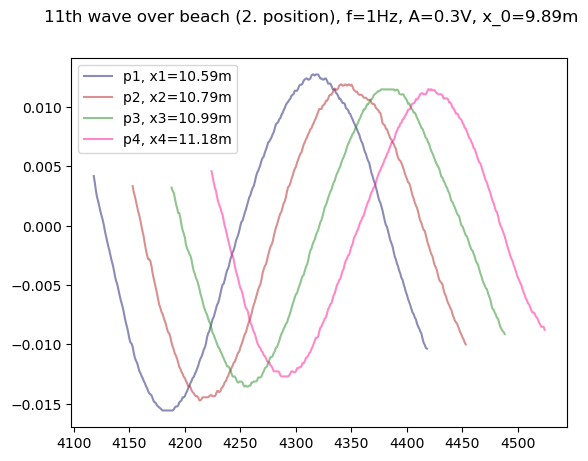

In [259]:
fig, ax = plt.subplots()

ax.plot(x1059_f1_r1.loc[idx_time_p1_x10:idx_time_p1_x10+300, 'p1'], label='p1, x1=10.59m', color='midnightblue', alpha=0.5)
#ax.plot(x1059_f1_r2.loc[idx_time_p1_x10:idx_time_p1_x10+300, 'p1'], label='p1, x1=10.59m', color='slateblue', alpha=0.5)
#ax.plot(x1059_f1_r3.loc[idx_time_p1_x10:idx_time_p1_x10+300, 'p1'], label='p1, x1=10.59m', color='cornflowerblue', alpha=0.5)

ax.plot(x1059_f1_r1.loc[idx_time_p2_x10:idx_time_p2_x10+300, 'p2'], label='p2, x2=10.79m', color='firebrick', alpha=0.5)
#ax.plot(x1059_f1_r2.loc[idx_time_p2_x10:idx_time_p2_x10+300, 'p2'], label='p2, x2=10.79m', color='indianred', alpha=0.5)
#ax.plot(x1059_f1_r3.loc[idx_time_p2_x10:idx_time_p2_x10+300, 'p2'], label='p2, x2=10.79m', color='lightcoral', alpha=0.5)

ax.plot(x1059_f1_r1.loc[idx_time_p3_x10:idx_time_p3_x10+300, 'p3'], label='p3, x3=10.99m', color='forestgreen', alpha=0.5)
#ax.plot(x1059_f1_r2.loc[idx_time_p3_x10:idx_time_p3_x10+300, 'p3'], label='p3, x3=10.99m', color='limegreen', alpha=0.5)
#ax.plot(x1059_f1_r3.loc[idx_time_p3_x10:idx_time_p3_x10+300, 'p3'], label='p3, x3=10.99m', color='mediumseagreen', alpha=0.5)

ax.plot(x1059_f1_r1.loc[idx_time_p4_x10:idx_time_p4_x10+300, 'p4'], label='p4, x4=11.18m', color='deeppink', alpha=0.5)
#ax.plot(x1059_f1_r2.loc[idx_time_p4_x10:idx_time_p4_x10+300, 'p4'], label='p4, x4=11.18m', color='hotpink', alpha=0.5)
#ax.plot(x1059_f1_r3.loc[idx_time_p4_x10:idx_time_p4_x10+300, 'p4'], label='p4, x4=11.18m', color='lightpink', alpha=0.5)

fig.suptitle('11th wave over beach (2. position), f=1Hz, A=0.3V, x_0=9.89m')
ax.legend()

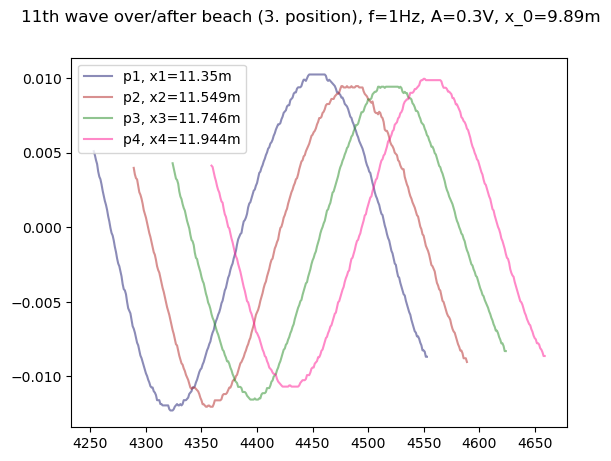

In [261]:
fig, ax = plt.subplots()

ax.plot(x1135_f1_r1.loc[idx_time_p1_x11:idx_time_p1_x11+300, 'p1'], label=f'p1, x1={x[8]}m', color='midnightblue', alpha=0.5)
#ax.plot(x1135_f1_r2.loc[idx_time_p1_x11:idx_time_p1_x11+300, 'p1'], label=f'p1, x1={x[8]}m', color='slateblue', alpha=0.5)
#ax.plot(x1135_f1_r3.loc[idx_time_p1_x11:idx_time_p1_x11+300, 'p1'], label=f'p1, x1={x[8]}m', color='cornflowerblue', alpha=0.5)

ax.plot(x1135_f1_r1.loc[idx_time_p2_x11:idx_time_p2_x11+300, 'p2'], label=f'p2, x2={x[9]}m', color='firebrick', alpha=0.5)
#ax.plot(x1135_f1_r2.loc[idx_time_p2_x11:idx_time_p2_x11+300, 'p2'], label=f'p2, x2={x[9]}m', color='indianred', alpha=0.5)
#ax.plot(x1135_f1_r3.loc[idx_time_p2_x11:idx_time_p2_x11+300, 'p2'], label=f'p2, x2={x[9]}m', color='lightcoral', alpha=0.5)

ax.plot(x1135_f1_r1.loc[idx_time_p3_x11:idx_time_p3_x11+300, 'p3'], label=f'p3, x3={x[10]}m', color='forestgreen', alpha=0.5)
#ax.plot(x1135_f1_r2.loc[idx_time_p3_x11:idx_time_p3_x11+300, 'p3'], label=f'p3, x3={x[10]}m', color='limegreen', alpha=0.5)
#ax.plot(x1135_f1_r3.loc[idx_time_p3_x11:idx_time_p3_x11+300, 'p3'], label=f'p3, x3={x[10]}m', color='mediumseagreen', alpha=0.5)

ax.plot(x1135_f1_r1.loc[idx_time_p4_x11:idx_time_p4_x11+300, 'p4'], label=f'p4, x4={x[11]}m', color='deeppink', alpha=0.5)
#ax.plot(x1135_f1_r2.loc[idx_time_p4_x11:idx_time_p4_x11+300, 'p4'], label=f'p4, x4={x[11]}m', color='hotpink', alpha=0.5)
#ax.plot(x1135_f1_r3.loc[idx_time_p4_x11:idx_time_p4_x11+300, 'p4'], label=f'p4, x4={x[11]}m', color='lightpink', alpha=0.5)

fig.suptitle('11th wave over/after beach (3. position), f=1Hz, A=0.3V, x_0=9.89m')
ax.legend()

In [239]:
def mean_height(df0, df1, df2):
    probes = ['p1', 'p2', 'p3', 'p4']
    dfs = [df0, df1, df2]
    
    mean_values = []
    for df in dfs:
        for p in probes:
            mean_values.append(df[p].mean()) 

    return np.array(mean_values)


In [240]:
mean_r1 = mean_height(x9793_f1_r1, x1059_f1_r1, x1135_f1_r1)
mean_r2 = mean_height(x9793_f1_r2, x1059_f1_r2, x1135_f1_r2)
mean_r3 = mean_height(x9793_f1_r3, x1059_f1_r3, x1135_f1_r3)

In [241]:
mean_r1

array([ 1.30548292e-04,  1.08453842e-04,  1.38175027e-04, -9.84458378e-05,
       -1.24604403e-04, -2.21881254e-06,  1.19817211e-04,  2.77734490e-04,
        1.04655816e-04, -1.57361259e-04, -1.58251067e-04, -3.09164888e-05])

Text(0.5, 0.98, 'Mean water height, 1 Hz waves')

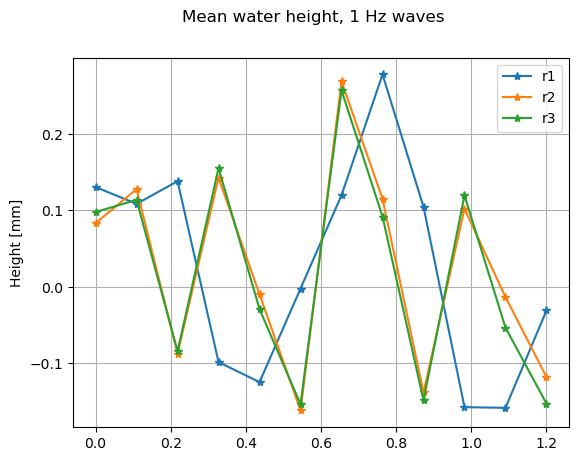

In [249]:
xs = np.linspace(0,1.2,12)

fig, ax = plt.subplots()
ax.plot(xs, mean_r1*1000, marker= '*', label='r1')
ax.plot(xs, mean_r2*1000, marker= '*',label='r2')
ax.plot(xs, mean_r3*1000, marker= '*',label='r3')

ax.legend()
ax.grid()
ax.set_ylabel('Height [mm]')
fig.suptitle('Mean water height, 1 Hz waves')

In [250]:
noise = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/Noise Measurement/Noise_Measurement_modified.csv')

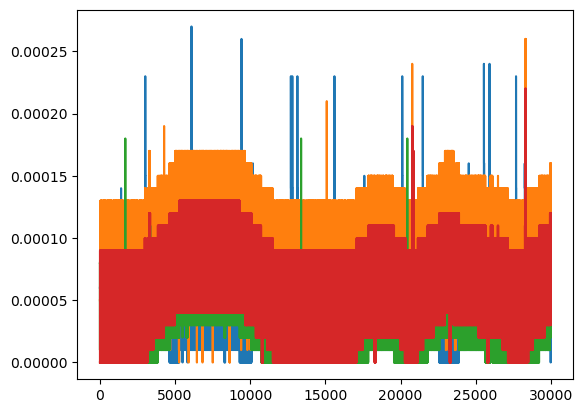

In [254]:
for column in noise.columns[1:-1]:
    plt.plot(noise[column])

Amplitude of wave at x meters after start of beach: 

$A = A_0 exp(-\alpha x)$

where $A_0$ is the amplitude at $x=0$, meaning the beginning of the beach. 

Thus, the wave damping is:
$\alpha = \frac{ln(A_0) - ln(A(x_1))}{x_1 - x_0}$

In [ ]:
def alpha_damp(A0, A1, x0, x1):
    alpha = (np.log(A0) - np.log(A1))/(x1 - x0)
    return alpha

0      -0.00006
1      -0.00006
2      -0.00006
3      -0.00006
4      -0.00006
         ...   
7491    0.01380
7492    0.01354
7493    0.01337
7494    0.01303
7495    0.01269
Name: p2, Length: 7496, dtype: float64

Notes:
- need to find a way to catch the 10th wave for 1 Hz. 
- process the data.. 124 measurements per probe per second..
- want: for 1 frequency: plot of 10 th wave (all three runs) for all probes. 
- plot of alpha over the beach and the corresponding damping
- plot of mean height during wave passing (as 26.03 experiments)